<a href="https://colab.research.google.com/github/motm-1/DS-proyects/blob/main/Stock_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Elegimos el dataset, en este caso elijo el de MicroStrategy.

In [ ]:
msrt_data = pd.read_csv('/content/drive/MyDrive/Data_MSTR.csv')

# Analizamos los datos para entenderlos y saber como vamos a trabajarlos antes de crear los modelos

In [ ]:
msrt_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/21/2022,$232.62,362554,$218.55,$234.43,$216.49
1,10/20/2022,$221.01,267550,$228.23,$234.89,$219.22
2,10/19/2022,$226.08,271305,$228.08,$234.49,$223.959
3,10/18/2022,$235,610315,$230.2,$235.31,$219.64
4,10/17/2022,$221.13,334410,$220,$226.27,$218.81


In [ ]:
msrt_data.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [ ]:
msrt_columns = msrt_data.columns
msrt_columns = msrt_columns.delete((0, 2))

In [ ]:
for column in msrt_columns:
  msrt_data[column] = msrt_data[column].str.replace('$','')
  msrt_data[column] = msrt_data[column].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
msrt_data.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000
mean,273.945171,3.387684e+05,274.454353,281.924469,266.200759
std,214.375076,4.326119e+05,215.852412,223.456375,205.777031
min,92.200000,2.340600e+04,91.760000,104.150000,90.000000
25%,133.652500,7.130175e+04,133.337500,135.092500,131.700000
50%,147.340000,1.233550e+05,147.360000,148.710000,145.430000
75%,394.887500,4.973988e+05,398.872500,411.500000,384.827500
max,1272.940000,4.692910e+06,1196.010000,1315.000000,1065.407000


In [ ]:
msrt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1258 non-null   object 
 1   Close/Last  1258 non-null   float64
 2   Volume      1258 non-null   int64  
 3   Open        1258 non-null   float64
 4   High        1258 non-null   float64
 5   Low         1258 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [ ]:
index = msrt_data.index[::-1]
msrt_data.index = index

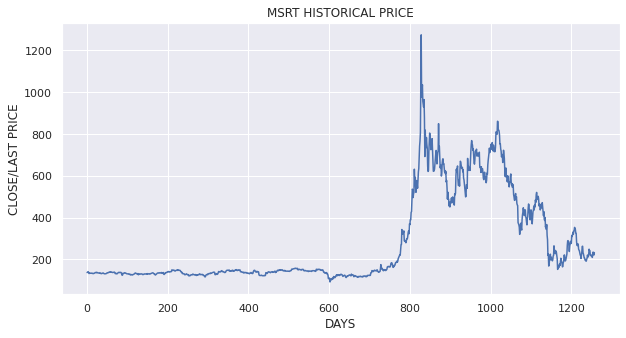

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('MSRT HISTORICAL PRICE')
ax.set_xlabel('DAYS')
ax.set_ylabel('CLOSE/LAST PRICE')
plt.plot(index, msrt_data['Close/Last'])

In [ ]:
msrt_lastprice = msrt_data['Close/Last']

In [ ]:
msrt_lastprice.index = index
msrt_lastprice.tail()

4    135.81
3    140.86
2    140.96
1    137.85
0    137.04
Name: Close/Last, dtype: float64

#Creamos una variable para predecir "n" dias en el futuro.
Lo que hacemos, es eliminar los datos de los ultimos 20 dias para intentar predecirlos, nuestro programa va a intentar replicar la realidad de la manera mas precisa posible.

In [ ]:
future_days = 20

msrt_prediction = msrt_lastprice.shift(future_days)
msrt_prediction.tail()

4    138.20
3    136.30
2    137.43
1    137.46
0    137.00
Name: Close/Last, dtype: float64

# Nuestra variable x e y seran el dataset limpio con el que trabajaremos, sin los datos nulos.

In [ ]:
x = np.array(msrt_lastprice[future_days:])
x_reshape = x.reshape(-1,1)
y = np.array(msrt_prediction[future_days:])
data = {'Real':x, 'Prediction':y}
msrt_final_df = pd.DataFrame(data, index=index[future_days:])
print(msrt_final_df.head())

        Real  Prediction
1237  191.45      232.62
1236  192.32      221.01
1235  195.92      226.08
1234  196.60      235.00
1233  206.20      221.13


# Dividimos el dataset en datos de entrenamiento (75%) y datos de testeo (25%)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_reshape, y, test_size=0.25)

# Creamos el modelo de regresion lineal y el arbol de decision, son los dos modelos que ocuparemos, luego decidiremos con cual nos quedamos.

In [ ]:
linear_regression = LinearRegression().fit(xtrain, ytrain)
decision_tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# Creamos una variable con las primeras n filas del dataset


In [ ]:
last_rows = msrt_lastprice[:future_days]
last_rows = np.array(last_rows).reshape(-1,1)

# Prediccion del arbol decision

In [ ]:
decision_tree_prediction = decision_tree.predict(last_rows)
decision_tree_prediction

array([221.28, 212.26, 349.08, 241.67, 319.15, 299.12, 331.5 , 242.19,
       196.73, 331.5 , 331.5 , 265.8 , 265.8 , 200.18, 171.34, 167.6 ,
       167.6 , 331.5 , 221.13, 330.01])

# Prediccion de la regresion lineal

In [ ]:
linear_regression_prediction = linear_regression.predict(last_rows)
linear_regression_prediction

array([238.25255906, 227.72211231, 232.3206795 , 240.4112553 ,
       227.83095414, 217.1100342 , 227.29581516, 225.33666228,
       223.51356168, 227.39558683, 227.07813151, 246.46104684,
       246.93269475, 252.87364447, 230.90573575, 219.78572911,
       219.38664241, 227.23232409, 214.17130487, 208.8289852 ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


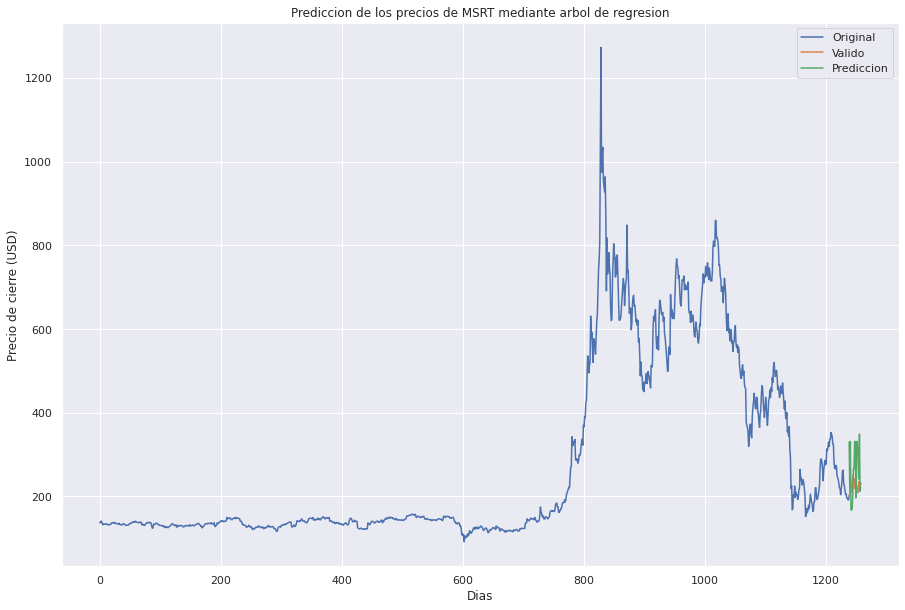

In [ ]:
predictions = decision_tree_prediction
valid_dcst = msrt_data[:future_days]
valid_dcst['Predictions'] = predictions

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Prediccion de los precios de MSRT mediante arbol de regresion')
ax.set_xlabel('Dias')
ax.set_ylabel('Precio de cierre (USD)')
plt.plot(msrt_lastprice)
plt.plot(valid_dcst[['Close/Last','Predictions']])
ax.legend(['Original', 'Valido', 'Prediccion'])
plt.show()

# Prediccion de la regresion lineal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


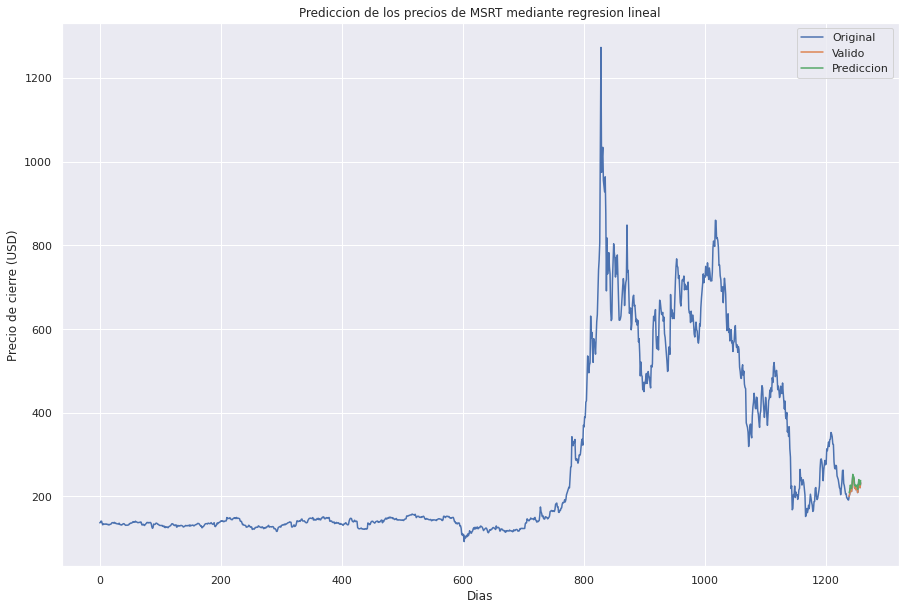

In [ ]:
predictions = linear_regression_prediction
valid_lnr = msrt_data[:future_days]
valid_lnr['Predictions'] = predictions

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Prediccion de los precios de MSRT mediante regresion lineal')
ax.set_xlabel('Dias')
ax.set_ylabel('Precio de cierre (USD)')
plt.plot(msrt_lastprice)
plt.plot(valid_lnr[['Close/Last','Predictions']])
ax.legend(['Original', 'Valido', 'Prediccion'])
plt.show()